# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


In [42]:
# cities = cities[:10]
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"  
#   city_url = url + f"&lat={Lat}&lon={lon}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

#         Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chibougamau
Processing Record 2 of Set 1 | la ronge
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | kabala
Processing Record 10 of Set 1 | san ignacio de velasco
Processing Record 11 of Set 1 | awjilah
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | takamaka
City not found. Skipping...
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | ta`u
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1

Processing Record 40 of Set 4 | callao
Processing Record 41 of Set 4 | fort st. john
Processing Record 42 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 43 of Set 4 | brak
Processing Record 44 of Set 4 | chimala
Processing Record 45 of Set 4 | margaret river
Processing Record 46 of Set 4 | nicoya
Processing Record 47 of Set 4 | rio san juan
Processing Record 48 of Set 4 | queenstown
Processing Record 49 of Set 4 | esperanza
Processing Record 0 of Set 5 | alofi
Processing Record 1 of Set 5 | guaratuba
Processing Record 2 of Set 5 | san luis de la loma
Processing Record 3 of Set 5 | kingston
Processing Record 4 of Set 5 | petropavlovsk-kamchatsky
Processing Record 5 of Set 5 | el granada
Processing Record 6 of Set 5 | salalah
Processing Record 7 of Set 5 | toga village
City not found. Skipping...
Processing Record 8 of Set 5 | visakhapatnam
Processing Record 9 of Set 5 | kulia village
City not found. Skipping...
Processing Record 10 of Set 5 | yangambi
Process

Processing Record 28 of Set 8 | fuxin
Processing Record 29 of Set 8 | amancio
City not found. Skipping...
Processing Record 30 of Set 8 | izluchinsk
Processing Record 31 of Set 8 | newman
Processing Record 32 of Set 8 | itamaraca
Processing Record 33 of Set 8 | santa cruz cabralia
Processing Record 34 of Set 8 | turkmenbasy
Processing Record 35 of Set 8 | west end
Processing Record 36 of Set 8 | karlskoga
Processing Record 37 of Set 8 | igarka
Processing Record 38 of Set 8 | timimoun
Processing Record 39 of Set 8 | eureka
Processing Record 40 of Set 8 | letlhakeng
Processing Record 41 of Set 8 | san andres
Processing Record 42 of Set 8 | nabire
Processing Record 43 of Set 8 | tukrah
Processing Record 44 of Set 8 | mhango
Processing Record 45 of Set 8 | leua
Processing Record 46 of Set 8 | usogorsk
Processing Record 47 of Set 8 | urumqi
Processing Record 48 of Set 8 | aykhal
Processing Record 49 of Set 8 | boguchany
Processing Record 0 of Set 9 | okhotsk
Processing Record 1 of Set 9 | m

Processing Record 14 of Set 12 | hun
Processing Record 15 of Set 12 | manokwari
Processing Record 16 of Set 12 | kargasok
Processing Record 17 of Set 12 | bairnsdale
Processing Record 18 of Set 12 | kashary
Processing Record 19 of Set 12 | kantagi
Processing Record 20 of Set 12 | palapag
Processing Record 21 of Set 12 | rabaul
Processing Record 22 of Set 12 | tuensang
Processing Record 23 of Set 12 | kaitong
Processing Record 24 of Set 12 | port hedland
Processing Record 25 of Set 12 | haiku-pauwela
Processing Record 26 of Set 12 | nyaungdon
Processing Record 27 of Set 12 | zabol
Processing Record 28 of Set 12 | lisakovsk
Processing Record 29 of Set 12 | mana
Processing Record 30 of Set 12 | lapai
Processing Record 31 of Set 12 | la palma
Processing Record 32 of Set 12 | la'ie
Processing Record 33 of Set 12 | picnic point-north lynnwood
City not found. Skipping...
Processing Record 34 of Set 12 | nguigmi
Processing Record 35 of Set 12 | ndele
Processing Record 36 of Set 12 | luganville

In [47]:
# city_weather["main"]["temp_max"]

In [50]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chibougamau,49.9168,-74.3659,276.94,93,100,4.63,CA,1682369319
1,la ronge,55.1001,-105.2842,283.29,25,100,6.69,CA,1682369319
2,ushuaia,-54.8000,-68.3000,277.96,81,100,0.51,AR,1682369319
3,waitangi,-43.9535,-176.5597,284.16,71,86,0.89,NZ,1682369320
4,avarua,-21.2078,-159.7750,300.18,65,20,6.17,CK,1682369320


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chibougamau,49.9168,-74.3659,276.94,93,100,4.63,CA,1682369319
1,la ronge,55.1001,-105.2842,283.29,25,100,6.69,CA,1682369319
2,ushuaia,-54.8000,-68.3000,277.96,81,100,0.51,AR,1682369319
3,waitangi,-43.9535,-176.5597,284.16,71,86,0.89,NZ,1682369320
4,avarua,-21.2078,-159.7750,300.18,65,20,6.17,CK,1682369320


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

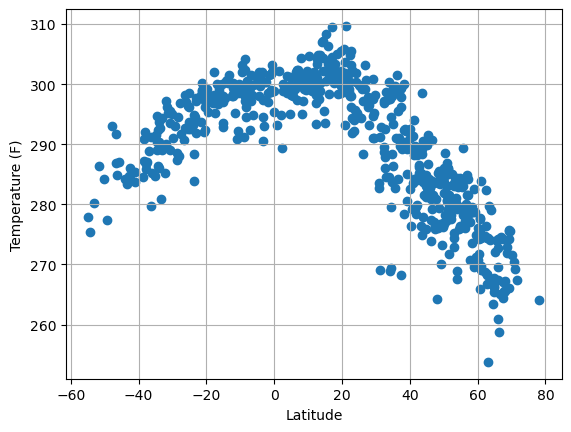

In [54]:
# Build scatter plot for latitude vs. temperature

x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x,y)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

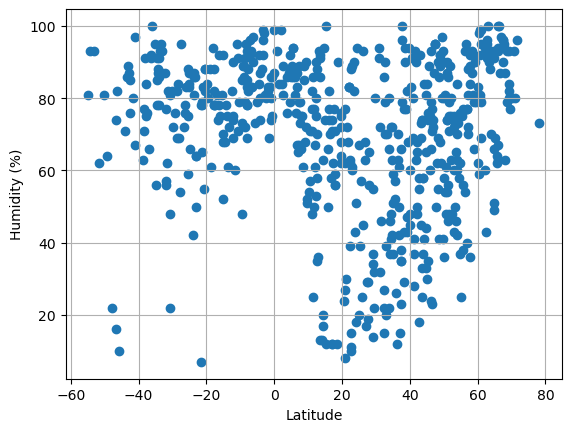

In [55]:
# Build the scatter plots for latitude vs. humidity

h = city_data_df["Humidity"]
x = city_data_df["Lat"]
plt.scatter(x,h)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

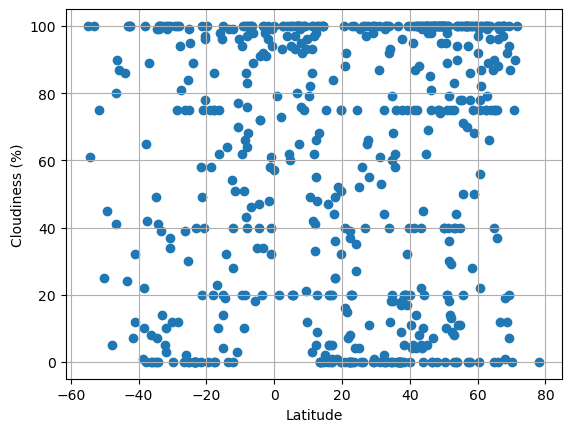

In [56]:
# Build the scatter plots for latitude vs. cloudiness

c = city_data_df["Cloudiness"]
x = city_data_df["Lat"]
plt.scatter(x,c)

# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

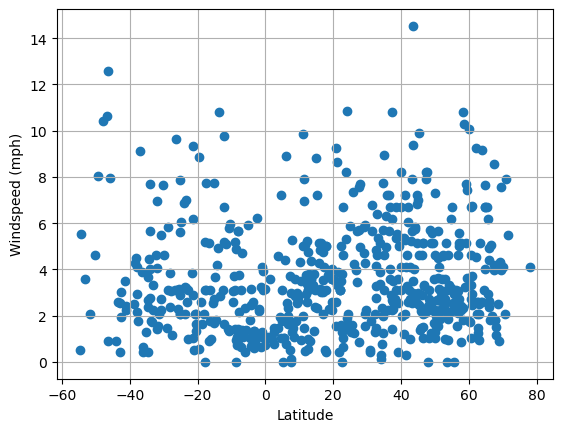

In [57]:
# Build the scatter plots for latitude vs. wind speed

ws = city_data_df["Wind Speed"]
x = city_data_df["Lat"]
plt.scatter(x,ws)
plt.grid()
# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [59]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):   
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chibougamau,49.9168,-74.3659,276.94,93,100,4.63,CA,1682369319
1,la ronge,55.1001,-105.2842,283.29,25,100,6.69,CA,1682369319
5,vorgashor,67.5833,63.9500,267.01,90,100,4.17,RU,1682369320
6,tura,25.5198,90.2201,294.33,57,0,1.61,IN,1682369320
7,hawaiian paradise park,19.5933,-154.9731,300.88,72,75,2.57,US,1682369321


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,277.96,81,100,0.51,AR,1682369319
3,waitangi,-43.9535,-176.5597,284.16,71,86,0.89,NZ,1682369320
4,avarua,-21.2078,-159.7750,300.18,65,20,6.17,CK,1682369320
9,san ignacio de velasco,-16.3667,-60.9500,297.27,92,62,1.77,BO,1682369321
12,grytviken,-54.2811,-36.5092,275.34,93,61,5.52,GS,1682369322


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8742017022108697


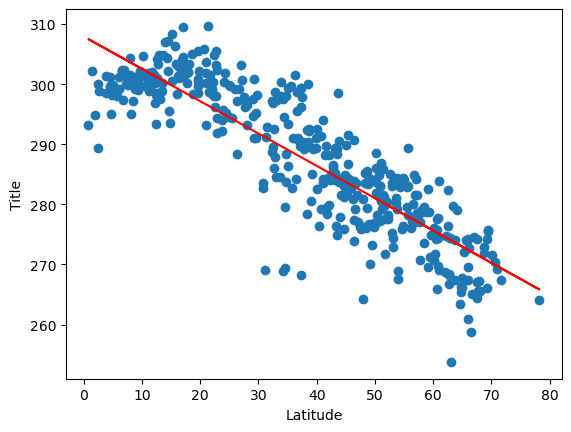

In [62]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8087981329306486


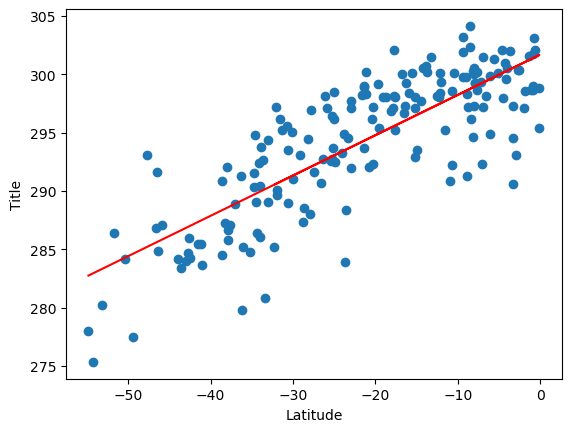

In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))


**Discussion about the linear relationship:** There has huge relationship, the title changed when the latitude changed

In [64]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1737666645942721


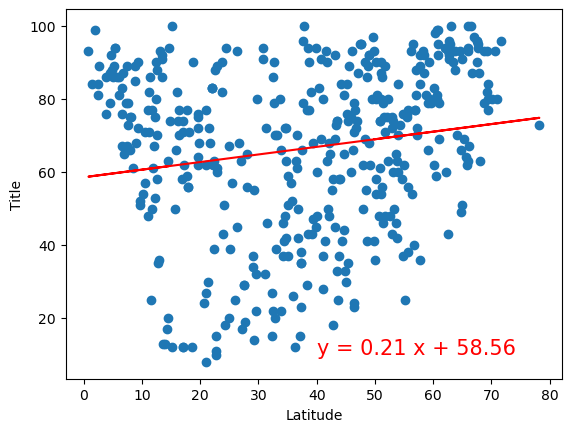

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.2189173560419014


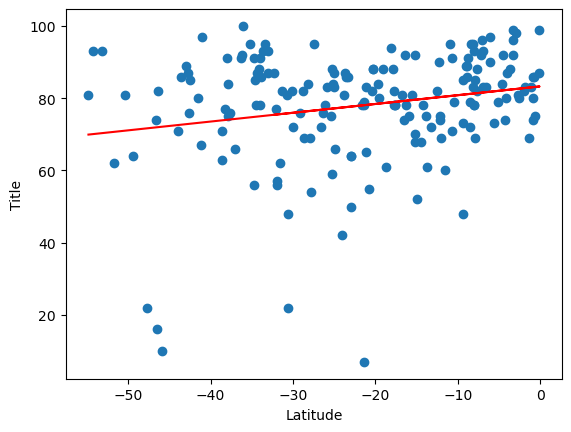

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** There has relationship, but not too much

In [67]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.13070390208616123


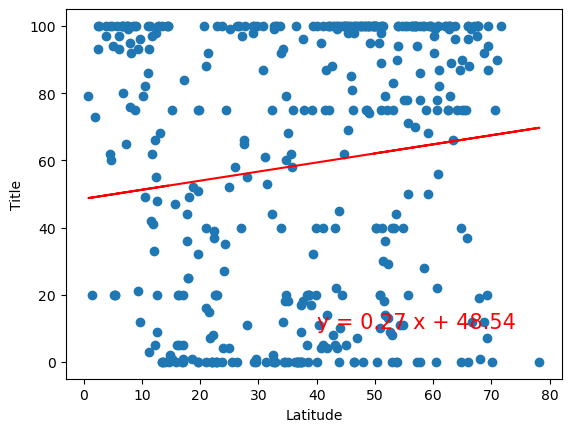

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.13696134791463743


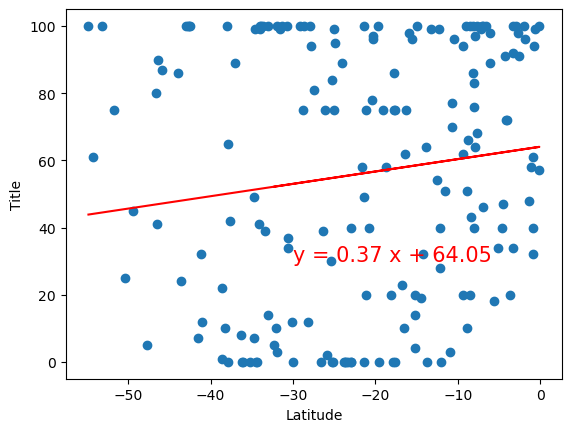

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** Northern Hemisphere is less relationship, Southern Hemisphere has lager relationship

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.11706091640558675


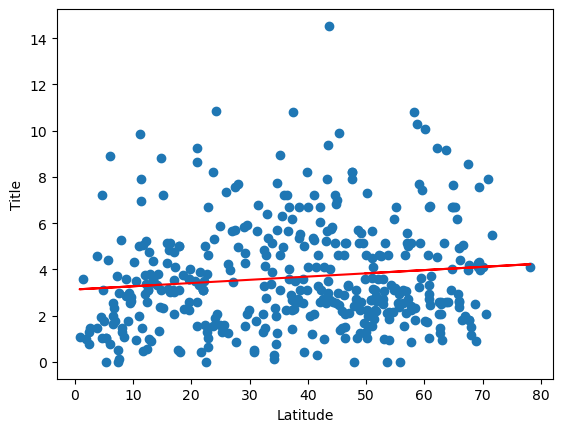

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.21179404074013472


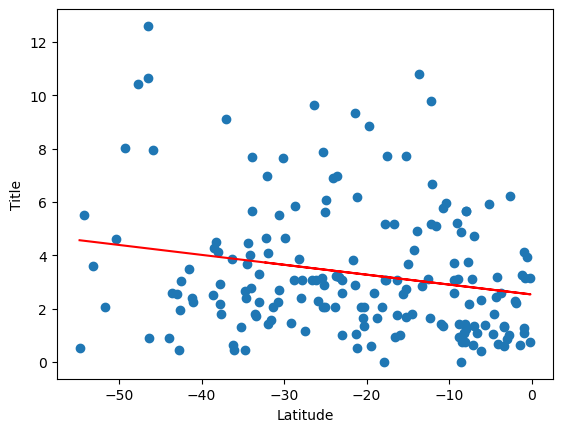

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** Northern Hemisphere is less relationship, Southern Hemisphere has relationship but not too much.